In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def visualize_lawn(lawn):
    # lawn_with_path is a 2d numpy array similar to an environment_state where:
    # 0 represents un-mowed lawn
    # 1 represents a space the mower cannot occupy, (ex. house, trees, etc.)
    # 2 represents a space that can be occupied but not mowed, (ex. driveway)
    # 3 represents mowed lawn (no direction)
    # 4 represents the mower
    # 5-8 represents mowed lawn where the mower did not change direction, the number on the mowed surface represents the direction in which it has been mowed
    # 5 = north
    # 6 = south
    # 7 = east
    # 8 = west
    # 9-12 represents mowed lawn where the mower also changed direction
    # 9 = north to west, or east to south
    # 10 = north to east, or west to south
    # 11 = south to west, or east to north
    # 12 = south to east, or west to north
    
    # load each image as an array
    grass = np.asarray(Image.open("textures/grass.png"))
    cut_grass = np.asarray(Image.open("textures/cut_grass.png"))
    gravel = np.asarray(Image.open("textures/gravel.png"))
    agent = np.asarray(Image.open("textures/agent.png"))
    wood = np.asarray(Image.open("textures/wood.png"))
    north = np.asarray(Image.open("textures/north.png"))
    south = np.asarray(Image.open("textures/south.png"))
    east = np.asarray(Image.open("textures/east.png"))
    west = np.asarray(Image.open("textures/west.png"))
    north_to_west = np.asarray(Image.open("textures/north_to_west.png")) # same as east to south
    north_to_east = np.asarray(Image.open("textures/north_to_east.png")) # same as west to south
    south_to_west = np.asarray(Image.open("textures/south_to_west.png")) # same as east to north
    south_to_east = np.asarray(Image.open("textures/south_to_east.png")) # same as west to north
    # save env dimensions
    ncols = lawn.shape[1]
    nrows = lawn.shape[0]
    # make array of image data fitting the environment state
    numeric_image_array = []
    for element in lawn.flatten():
        if element == 0:
            numeric_image_array.append(grass)
        elif element == 1:
            numeric_image_array.append(wood)
        elif element == 2:
            numeric_image_array.append(gravel)
        elif element == 3:
            numeric_image_array.append(cut_grass)
        elif element == 4:
            numeric_image_array.append(agent)
        elif element == 5:
            numeric_image_array.append(north)
        elif element == 6:
            numeric_image_array.append(south)
        elif element == 7:
            numeric_image_array.append(east)
        elif element == 8:
            numeric_image_array.append(west)
        elif element == 9:
            numeric_image_array.append(north_to_west) # same as east to south
        elif element == 10:
            numeric_image_array.append(north_to_east) # same as west to south
        elif element == 11:
            numeric_image_array.append(south_to_west) # same as east to north
        elif element == 12:
            numeric_image_array.append(south_to_east) # same as west to north
        else:
            raise Exception('unknown element found in lawn_with_path array')
    numeric_image_array = np.array(numeric_image_array)

    # convert array shape to (height*nrows, width*ncols, intensity) so that matplotlib can display it
    height, width, intensity = grass.shape
    reformatted_numeric_image_array = numeric_image_array.reshape(nrows, ncols, height, width, intensity).swapaxes(1,2).reshape(height*nrows, width*ncols, 4)

    plt.figure(figsize=(20,20))
    plt.imshow(reformatted_numeric_image_array)
    plt.xticks([])
    plt.yticks([])
    #plt.savefig("test.png")
    plt.show()
    

In [7]:
test_lawn = np.array([
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 2, 0,12, 7, 7, 7, 9, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 2,10, 8, 8, 8, 8,11, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 2,12, 7, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 2, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 0, 0, 6, 5, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [2, 2, 2, 2, 2, 2, 0, 0, 6, 5, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0,12,11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

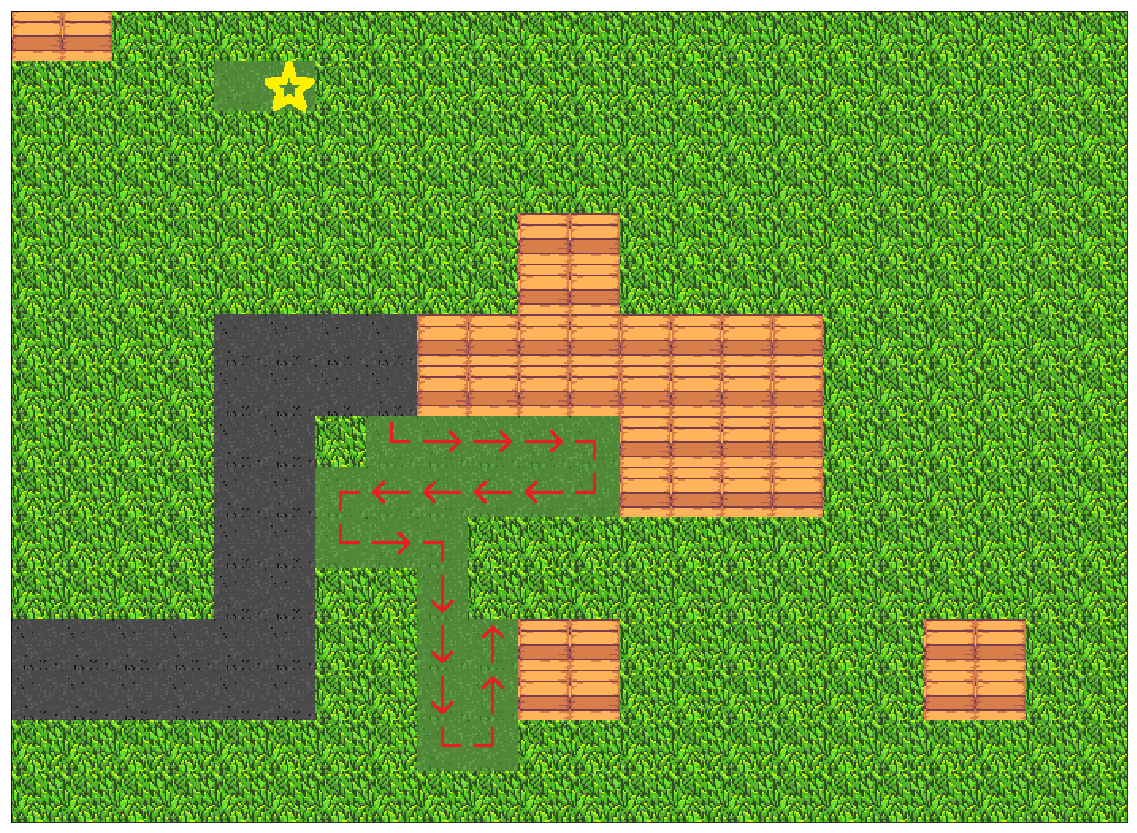

In [8]:
visualize_lawn(test_lawn)